##Luis David Pardo Pedraza

##Exploring and visualizing data from the Ramen market

Fictional case study with real data. Main focus is visualizing and communicating data in appealing ways.

##Business Problem

This notebook aims to provide useful information to a new entrant that wants to introduce new high quality ramen products in the market. The new organization is named DeliRamen and currently is looking for valuable findings that could help them to create a and distribute great ramen products that can be rated among the highest quality ramens in the insdustry. As a data scientist working for them, my main objective is to contribute with important insights that will push the company foward in their goal.

For doing so, this study will dive into the rating of thousands of ramen products from 2022.

##Audience, knowledge and visualization

As mentioned before the main audience of this study is a brand new company (DeliRamen) that wants to receive valuable tips for entering the ramen market and increase its chances of success. This notebook will address important information of the market such as rating trends, market size per country, big players in the industry and good practices that can be imitated for ensuring great performance in the market.

Also, efforts are made for making the visualization of this notebook easy to be communicated. I am trying to remove all the clutter, noise and distracting factors of the each graph. For example, I do this by eliminating axis labels or irrelevant datapoints. Additionally, I am catching the audience attention with different techniques like the strategic using of colors or the repositioning of some labels and titles.

###Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
from wordcloud import WordCloud
from IPython.display import Image

###Dataset

For this case, a dataset that haves fundamental information of the ramen market will be used.

This dataset is named "Top Ramen Ratings 2022" and can be found on the following URL:

https://www.kaggle.com/datasets/ankanhore545/top-ramen-ratings-2022

Additionally, this analysis will be conducted with the famous programming language Python.

###Accessing and loading the data

In [2]:
data = pd.read_csv(r"D:\PruebaTensor\DatasetVis\Top Ramen Ratings .csv")

##Data exploration

###General information of the DataFrame

For exploring the dataset, I begin by looking at its size and shape:

In [3]:
print("Shape of the Dataframe:", data.shape)
data.head(2)

Shape of the Dataframe: (4120, 7)


,Review #,Brand,Variety,Style,Country,Stars,T
0,4120,MIT,Shallot Sauce Dry Noodle,Pack,Taiwan,3,NaN
1,4119,Sapporo Ichiban,Tonkotsu Ramen Japanese Style Noodles,Bowl,United States,4.5,NaN


As can be seen the DataFrame has 4120 entries with 7 seven columns. Now let's check more general information of the dataset:

In [4]:
print("Name of the columns and data types:")
data.info()

Name of the columns and data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4120 entries, 0 to 4119
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Review #  4120 non-null   int64  
 1   Brand     4120 non-null   object 
 2   Variety   4120 non-null   object 
 3   Style     4120 non-null   object 
 4   Country   4120 non-null   object 
 5   Stars     4120 non-null   object 
 6   T         0 non-null      float64
dtypes: float64(1), int64(1), object(5)
memory usage: 225.4+ KB


According to the information above the dataset has the following variables:

1. Review #: Code of the entry.
2. Brand or manufacturer of the ramen.
3. Variety: Flavor, type, or specific variety of the ramen being reviewed.
4. Style: Packaging style of the ramen. Basically, provides information about how the ramen is presented and consumed.
5. Country: Location of the ramen.
6. Stars: Rating of the ramen.
7. T: Empty column without information.

Additionally, with the only exception of "Review #", the data type of all the columns is object type which suggest that all variables have string values or non numeric data. "Review #" is in integers which makes sense since it represents the number of the review or the index. Despite this, the "Stars" column that represents the rating should be a numeric variable.

##Data preprocessing

For preprocessing steps, the following factors will be considered:

-Duplicate values

-Missing values

-Non numeric ratings

###Duplicate values

Regarding duplicates, I perform a check to see if there exist any specific entries that appear more than once, and if so, remove them.

In [5]:
duplicates = data.duplicated()
duplicated_rows = data[duplicates]
print("Duplicated rows:")
print(duplicated_rows)

Duplicated rows:
Empty DataFrame
Columns: [Review #, Brand, Variety, Style, Country, Stars, T]
Index: []


As can be observed, the new "Duplicated rows" DataFrame is completely empty. This means that there are not duplicate values in the dataset.

###Missing values

For missing values I am checking their presenece in each column.

In [6]:
print("Number of missing values in each column:")
data.isna().sum()

Number of missing values in each column:


Review #       0
Brand          0
Variety        0
Style          0
Country        0
Stars          0
T           4120
dtype: int64

"T" column is the only one tha has missing values. Since this column is empty I am eliminating it since it does not contain valuable information.

In [7]:
data = data.drop(columns=["T"])

In [8]:
print("Total number of missing values:", data.isna().sum().sum())

Total number of missing values: 0


###Numeric rating

As mentioned in the exploration step, the "Star" variable has object data type which suggest that some of its values could be non numeric which is problematic for further analysis of this column. For this reason, I conduct a value check of each specific value present in this variable.

In [9]:
unique_values_stars = data["Stars"].unique()
print(unique_values_stars)

['3' '4.5' '2.75' '3.75' '5' '2.5' '4' '2.25' '3.5' '3.25' '0.25' '4.75'
 '0.5' '1' '1.5' '4.25' '1.75' '0' '2' '1.25' '0.75' 'NS' 'NR' '3.5/2.5'
 '4/4' '5/5' '4.5/5' '5/2.5' '5/4' '4.25/5' 'Unrated' '3.50' '1.1' '2.1'
 '0.9' '3.1' '4.125' '3.125' '2.125' '2.9' '0.1' '2.8' '3.7' '3.4' '3.6'
 '2.85' '2.3' '3.2' '3.65' '1.8']


With this check, it can be seen that there exist some string values like 'NS', 'NR' and 'Unrated'. The entries with these values represent missing data from the study for this reason I am reomving them.

Also, it is important to note that the are some values that do not provide an individual value for rating. For example, there are entries with values like "3.5/2.5", or "5/4". For this cases I am replacing them with the mean between the two values separated by the fraction "/". 

####Drop non-numeric values (missing info)

In [10]:
data = data[~data["Stars"].isin(["NS", "NR", "Unrated"])]

####Calculate the mean of the fractional ratings

In [11]:
data["Stars"] = data["Stars"].apply(lambda x: str(np.mean([float(i) for i in x.split('/')])) if '/' in str(x) else x)

####Converting the rating variable into numerical data

In [12]:
data["Stars"] = pd.to_numeric(data["Stars"], errors='coerce')

In [13]:
print("New Shape of the Dataframe:", data.shape)

New Shape of the Dataframe: (4113, 6)


The size of the DataFrame decreased just by 7 entries with the preprocessing steps (from 4120 to 4113).

##Data Analysis

###1. How looks like the distribution of quality in the ramen market?

This insight is essential for DeliRamen because it helps them to identify the best existing products (to learn from them) and the worst products(to avoid their practices). For visualizing easily the distribution of the quality in the market I am assigning a quality category to each ramen in the market according to its stars in the following way:

5.0 = Amazing

4.0 - 4.9 = Great

3.0 - 3.9 = Good

2.0 - 2.9 = Poor

1.0 - 1.9 = No good

0 - 0.9 = Avoid

In [14]:
def categorize_rating(Stars):
    if Stars == 5.0:
        return "Amazing"
    elif Stars >= 4.0:
        return "Great"
    elif Stars >= 3.0:
        return "Good"
    elif Stars >= 2.0:
        return "Poor"
    elif Stars >= 1.0:
        return "No good"
    else:
        return "Avoid"
    
data["quality_category"] = data["Stars"].apply(categorize_rating)

The code above allows to assign a quality category to each ramen according their Stars rating. It creates a new column called "quality category".

In [15]:
category_order = ["Amazing", "Great", "Good", "Poor", "No good", "Avoid"]
data["quality_category"] = pd.Categorical(data["quality_category"], categories=category_order, ordered=True)
colors1 = {
    'Amazing': '#00008B',
    'Great': '#6390F0',
    'Good': '#96D9D6',
    'Poor': '#d9dad8',
    'No good': '#d9dad8',
    'Avoid': '#d9dad8',
}

This part prestablishes the order in which the categories appear in the chart and the color palette that helps the audience to catch the most valuable information from the graph.

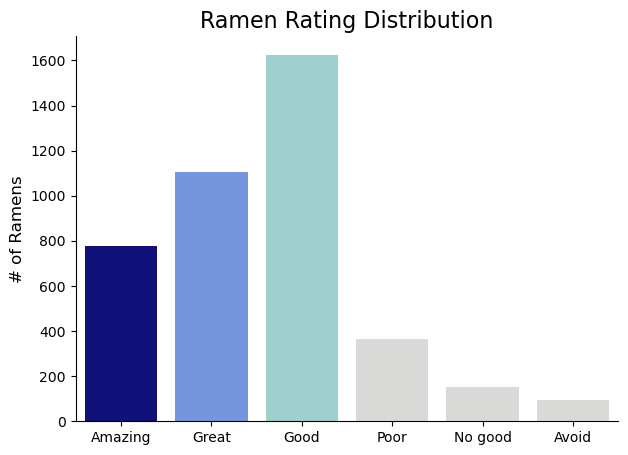

In [16]:
category_counts = data["quality_category"].value_counts().reindex(category_order)
plt.figure(figsize=(7, 5))
sns.barplot(x=category_counts.index, y=category_counts.values, palette=colors1)
plt.title('Ramen Rating Distribution', fontsize=16)
plt.xlabel('')
plt.ylabel('# of Ramens', fontsize=12)
plt.xticks(rotation=0)
sns.despine(top=True, right=True)
plt.show()

Answer 1: The bar chart above, depicts the rating distribution of the ramen market from a quality perspective descending order. The most important thing to mention for DeliRamen is that there are almost 800 Amazing quality products in the market from which the company can learn and imitate their practices. This is approximately the 20% of the rated products. Additionally, is important to mention that currently the market is populated mainly by higher quality products since the Great and Good categories have over 1000 ramen products each. None of the low quality ramen categories surpass the 400 products individually and they don't surpass the 700 amount of products combined. This means that the low quality products in the market are just about the 17% of the rated products.

For the visualization, the unnecessary clutter is removed to leave only the important information on the chart.

###2. How do the number of reviews and average rating look regarding countries?

This information is important for DeliRamen because it helps the company to decide from what countries would be a good idea to launch their products in order to get reviews. This is because not all countries have the same representation in the rated market. Also, some countries have a better reputation than others. Identifying these countries can help DeliRamen to prioritize its benchmark studies on brands that are from those markets helping the organization to elaborate high quality ramen products.

In [17]:
country_data = data.groupby("Country").agg(
    average_stars=("Stars", "mean"),
    review_count=('Review #', 'count')
).reset_index()
filtered_country_data = country_data[country_data['review_count'] > 50]

First, I start by groping the data by country and making some calculations for its Review and Stars rating. In the case of reviews I make a count and regarding Stars I calculate the average for each country. Additionally, I chose to focus only on countries with more than 50 reviews for a smoother visualization.

In [18]:
fig = px.scatter(filtered_country_data, x='average_stars', y='review_count', size='review_count',
                 hover_name='Country', text='Country',
                 title="Average Stars vs. Review Count by Country (More than 50 reviews)",
                 size_max=60, color='average_stars', color_continuous_scale='Viridis')

fig.update_coloraxes(colorbar_title='Average Star')
fig.update_traces(textposition='top center')
fig.update_layout(
    xaxis_title="Average Stars",
    yaxis_title="# of Reviews",
    yaxis=dict(range=[0, 1100])
)
pio.write_image(fig, "bubble.png")

Now I generate a bubble chart with the mentioned information and stored it as a PNG file.

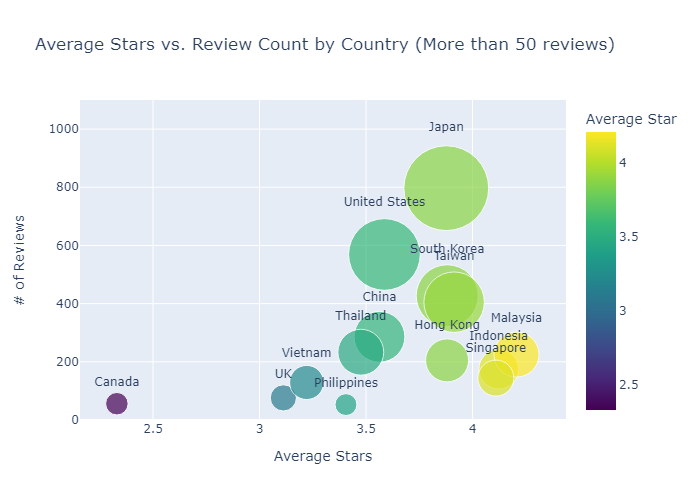

In [19]:
display(Image("bubble.png"))

Answer 2: The bubble chart above shows all the countries with more than 50 reviews in the ramen market. A bigger bubble of the country means a higher amount of reviews made out of that country. Also a clearer color reflects better quality ramen products. Taking this into consideration it can be said that Japanese and American ramens are the products with highest presence in the rated market with over 500 reviews each (Japan peaks at 800 reviews approximately). The rest of the market is manily dominated by Asian ramens from countries like South Korea, Taiwan, Malaysia, China and Thailand (all with more than 200 reviews). Considering quality, it is evident that Malaysia, Indonesia and Singapore have the best rated ramen products surpassing the 4 average stars rating barrier. Other notable mentions are Japan, South Korea, Taiwan and Hong Kong which are very close to the 4 average stars rating.

With this data, I suggest to DeliRamen to create subsidiaries and generate its products from countries like Japan, USA and on the Southeast Asia region to ensure great exposure and learn from the best to get high rating in the market reviews.

###3. What are the most relevant ramen brands in the market in terms of exposure?

Knowing this can help DeliRamen to know who are its main competitors and how big is their presence in the market. This insight is given by the amount of reviews that each single brand gets on the market. Even if these brands do not necessarily have the highest reviews it is important to note which ones have a broader market coverage.

In [20]:
brand_review_count = data.groupby('Brand').size().reset_index(name='Review_Count')
brand_review_count = brand_review_count.sort_values(by='Review_Count', ascending=False).head(15)

First I group all the entries by brand and count the number of times each brand appears in a review. Moreover, a variable to store this values is created. Then, the brands are sorted in descending order according to the number of reviews. Only the top 15 brands with more reviews are depicted.

In [21]:
colors2 = {
    'Nissin': '#154406',
    'Maruchan': '#008000',
    'Myojo': '#228B22',
    'Nongshim': '#228B22',
    'Samyang Foods': '#228B22',
}

def get_brand_color(brand):
    return colors2.get(brand, '#C1E1C1')
palette_colors1 = [get_brand_color(brand) for brand in brand_review_count['Brand']]

A palette of colors is set for the top brands. The idea is to put in a strong color the brands with the highest number of reviews and in a clear color those with lower values.

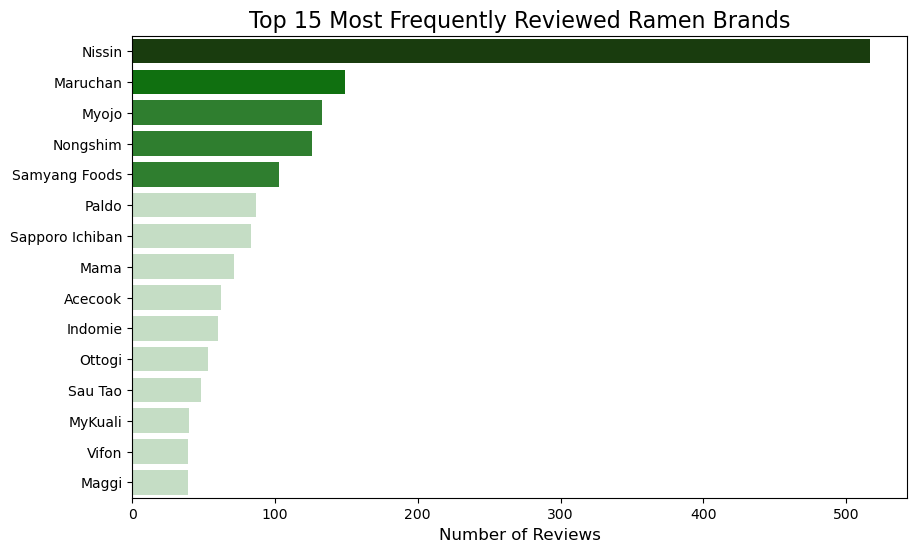

In [22]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Review_Count', y='Brand', data=brand_review_count.head(15), palette=palette_colors1)
plt.title('Top 15 Most Frequently Reviewed Ramen Brands', fontsize=16)
plt.xlabel('Number of Reviews', fontsize=12)
plt.ylabel('')
plt.show()

Answer 3: According to the graph above, DeliRamen should be aware that its products would have to compete againts already well established brands like Maruchan, Myojo, Nongshim and Samyang Foods, all with more than 100 rated products. It must be highlighted the case of Nissin which is the only brand with more than 500 products reviewed on the market. This suggests that the top companies in the ramen market usually offer to their customers a wide variety of different alternatives for ramen consumption which is a tip for DeliRamen to follow.

###4. What are the most reputable ramen brands in the market?

Having in the radar the competitors with the best rating in the market is an useful insight for DeliRamen since it can drag some knowledge out from these reputable players of the ramen market. For addressing this question, I am focusing only on the brands or manufacturers that have presence on the "Amazing" rated ramen products of the industry. The goal is to see what brands have the most amount of products in the "Amazing" category. For this reason, I am creating a new dataset with only these entries. Then I am grouping by brand and making a count.

In [23]:
top_ramen = data[data['quality_category'] == "Amazing"]

In [24]:
brand_five_star_count = top_ramen.groupby("Brand").size().reset_index(name="Top_Ramen_Count")
top_five_star_brands = brand_five_star_count.sort_values(by="Top_Ramen_Count", ascending=False).head(10)

In [25]:
colors3 = {
    'Nissin': '#392A48',
    'MyKuali': '#4B0082',
    'Nongshim': '#3E2F84',
    'Myojo': '#743089',
    'Maruchan': '#A865B5',
    'Samyang Foods': '#CEA2FE',
    'Paldo': '#CEA2FE',
}

def get_brand_color(brand):
    return colors3.get(brand, '#E0B0FF')
palette_colors2 = [get_brand_color(brand) for brand in top_five_star_brands['Brand']]

A color palette is set giving darker shades of color to the most relevant brands.

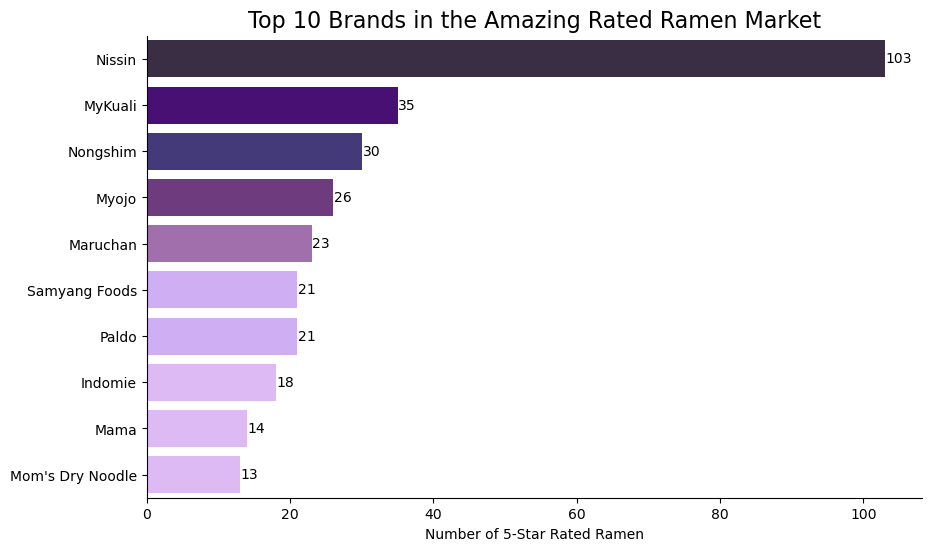

In [26]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="Top_Ramen_Count", y="Brand", data=top_five_star_brands, palette=palette_colors2)
plt.title("Top 10 Brands in the Amazing Rated Ramen Market", fontsize=16)
plt.xlabel('Number of 5-Star Rated Ramen')
plt.ylabel('')
for index, value in enumerate(top_five_star_brands['Top_Ramen_Count']):
    ax.text(value + 0.1, index, f'{value}', color='black', va="center")
sns.despine(top=True, right=True)
plt.show()

Answer 4: Regarding the main companies in the market in terms of quality Nissin is again the company with the biggest presence. It has over 100 products that are rated among the best in the market. Moreover, MyKuali and Nongshim are in second and third place respectevely with over 30 "Amazing" ramen products. Other important brands are Myojo, Maruchan, Samyang Foods and Paldo that surpass the 20 products barrier.

The information above provides DeliRamen with the names of various market players, allowing the company to conduct further benchmark analyses.

###5 What are the most common terms seen in the Amazing ramen market?

Now it is time to provide DeliRamen with insights related to some traits of the best ramen products in the market. For doing so, I am conducting a frequency visualization with a word cloud to see the most common terms used in the varieties of these products. With this type of visualization the most frequently used terms get a bigger font which makes them easy to spot.

Prior of generating the graph it is important to combine the values in the "Variety" column in a single string. 

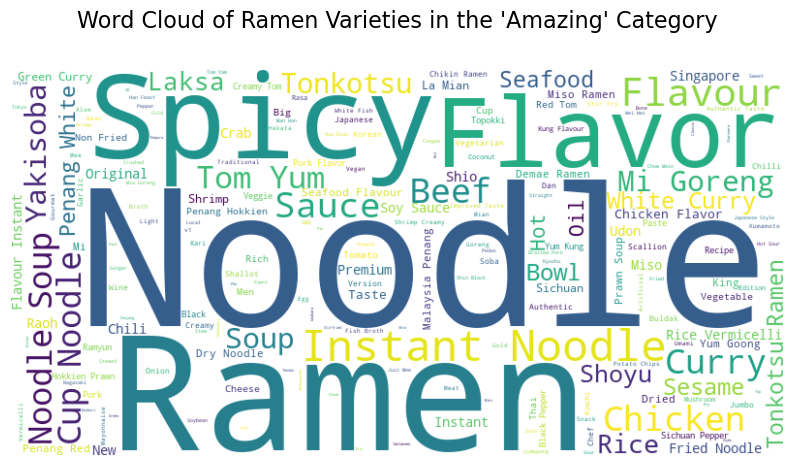

In [27]:
varieties = ' '.join(top_ramen['Variety'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="viridis").generate(varieties)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Ramen Varieties in the 'Amazing' Category", fontsize=16, pad=30)
plt.show()

Answer 5: As can be observed, the most common terms used by the Amazing market in the variety description are Ramen, Noodle, Flavor and Spicy. Some of these terms already give ideas for ramen preparations. For example, it is clear that DeliRamen must include spicy variants in its portfolio and must highlight the use of Noodles on its preparations as is an usual practice. Also, there are other frequently used terms that give lights on what ingridients should be used in the variants. Beef, chicken, tonkotsu and Sauce are some second tier words not so hard to spot in the cloud, which suggest that these ingridients are oftenly used for high rated ramens.

###6 What varieties are most seen in the Amazing ramen market?

Answering this question is fundamental for DeliRamen since it gives clear hints on what type of ramens they must create for their brand. To visualize this I am making a bar chart that portrays the top 10 recurrent varieties in the Amazing market.

In [28]:
variety_counts = top_ramen["Variety"].value_counts().head(10).reset_index()
variety_counts.columns = ["Variety", "Count"]

In [29]:
color5 = {
    "Yakisoba": "yellow",
    "Mi Goreng": "green",
    "White Fish Broth Rice Vermicelli": "lightgrey",
    "Pickled Vegetable Beef With Hua Diao Liquor": "lightgrey",
    "Sichuan Spicy Flavor": "lightgrey",
    "Penang White Curry Noodle": "red"
}
default_color = "red"
colors5 = [color5.get(variety, default_color) for variety in variety_counts["Variety"]]

I create a palette of colors that separates the most common varieties but also the ones tha use noodles.

In [30]:
fig = px.bar(variety_counts, x="Count", y="Variety", orientation="h", 
             title="Top 10 Most Common Ramen Varieties (Amazing Category)", 
             labels={"Count": "Number of Products", "Variety": "Ramen Variety"})
fig.update_traces(marker_color=colors5)
fig.update_layout(xaxis_title="# of Products", yaxis_title=None)
fig.update_coloraxes(showscale=False)
fig.update_layout(
    title={
        'x': 0.6,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)
fig.write_image("varieties.png")

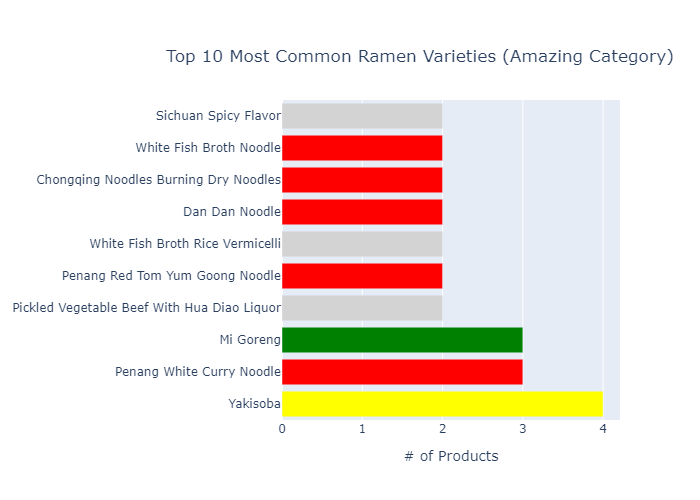

In [31]:
display(Image("varieties.png"))

Answer 6: This chart evidenciates that among the 800 Amazing products in the market very few share the exact variety or preparation. Indeed, Yakisoba is the most common variety but is only present 4 times in the Amazing market. It is followed by Mi Goreng and Penang with curry noodle, both with 3 products. Despite this, it is essential to note that as the previous answer stated it is a very common practice to include "noodle" in the varietys' names and is strongly suggested to have multiple preparations around this concept. With this DeliRamen finds already good ideas to develop its first ramen recipies.

###7 How is the packaging style of the best ramens in the market?

Another important aspect to consider when creating a new ramen product is the packaging, which plays a key role in how the product is presented to clients. As a result, I created a pie chart that illustrates the most common packaging styles used by top-rated ramen products to present themselves to consumers.

In [32]:
top_ramen_style = top_ramen.copy()
top_ramen_style["Style"].replace(['Bar', 'Tray', 'Can', 'Bottle', 'Restaurant'], 'Other', inplace=True)

I generate a copy to make changes on it instead of the original dataframe. Then I replace all packaging styles with low count numbers with "Other" value to facilitate visualization once the chart is generated.

In [33]:
style_counts = top_ramen_style['Style'].value_counts()

In [34]:
colors4 = {
    'Pack': '#ffcc00',
    'Bowl': '#FFA500',
    'Cup': '#e78b72',
    'Box': '#C4A484',
    'Other': '#d9dad8',
}
colors = [colors4.get(style) for style in style_counts.index]

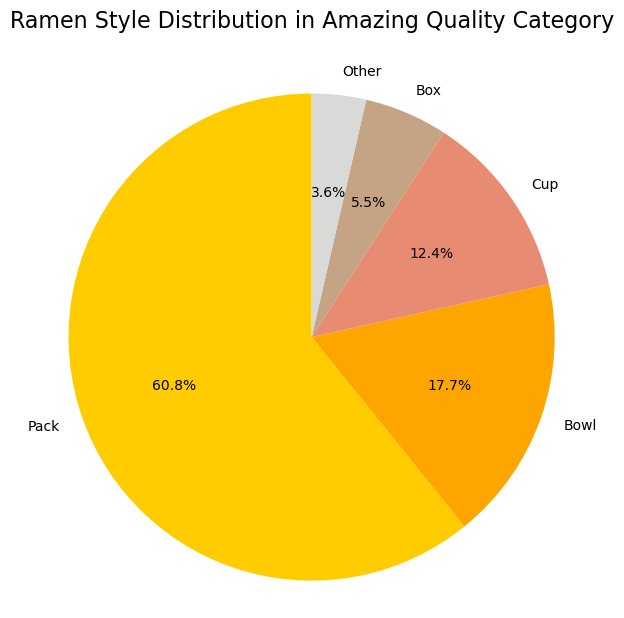

In [35]:
plt.figure(figsize=(7, 7))
plt.pie(style_counts, labels=style_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Ramen Style Distribution in Amazing Quality Category', fontsize=16, pad=30)
plt.axis('equal')
plt.show()

Answer 7: According to the above chart, the "Amazing" category of ramens are usually presented in packs. Indeed, more than the 60% of the best quality ramens are consumed in this style of package. Bowls come in second place with almost 20%, and Cups can be found in third place with just over 12%. This information is valuable for DeliRamen because it gives clear information on how to present their products for consumption in the market pursuing a high rating.

##Final conclusion and discussion

This analysis allowed to extract some valuable insights from the ramen market. In fact, It was found that only about the 20% of the ramen market can be considered Amazing in terms of rating. It is crucial to take into account some important factors if DeliRamen wants to reach the levels of this existing 20%. For starters, it is heavily suggested that the company launch its products from markets with great exposure and high quality products. This will help DeliRamen to get reviews and learn from reputable players. For example, Japan, USA, South Korea or Southeast Asian countries like Malaysia could be great choices for this.  

On a second note, DeliRamen should try to conduct benchmarks with important brands like Nissin, Maruchan, MyKuali, Myojo, Nongshim and Samyang Foods. These competitors are not only the most frequently rated in the market but also the ones with higher amount of Amazing rated ramens.

Additionally, it is recommended that DeliRamen generates a wide portfolio of ramen products with different varieties. Among these, it should include famous falvors or preparations like Yakisoba, Mi Goreng or Penang white curry noodle. They also should make a habit to include the word noodle in their descriptions whenever these are used because it is a very common practice from the best in the market. They should consider popular variants with ingridients such as beef, chicken, tonkotsu, rice or spicy flavors. Moreover, it is strongly suggested to present its products within packs or bowls since those are the most used by Amazing rated ramens.

The main strength of this pipeline is that it accuratelly addresses and solves the main business problem. If DeliRamen follows the suggestions made they can increase their chances of succes within this market. 

To conclude, it is important to acknowledge the limitations of this study. Firstly, the data lacks sales and profit information, which are essential factors to consider before making market investments. Secondly, there may be other factors that can influence the rating of ramen products that were not included in the original dataset. Because of this, DeliRamen might not be able to get the desired Amazing rating even if they stick to the insights I provided. Therefore, my main data-driven recommendation is to explore additional features or data sources that could offer further insights into the process of creating Amazing ramen products.

##References

Hore A. (2022) Top Ramen Ratings 2022. Available at: https://www.kaggle.com/datasets/ankanhore545/top-ramen-ratings-2022. (Accessed: 14 September 2024).